In [211]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model, metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

In [212]:
scoresMap = []

def chartOfTrueAndPredictedValues(y_test, y_pred):
    plt.figure(figsize=(10,10))
    plt.scatter(y_test, y_pred, c="crimson")
    p1 = max(max(y_pred), max(y_test))
    p2 = min(min(y_pred), min(y_test))
    plt.plot([p1, p2], [p1, p2], 'b-')
    plt.xlabel('True Values', fontsize=15)
    plt.ylabel('Predictions', fontsize=15)
    plt.axis('equal')
    plt.show()

def errorMetrics(y_test, y_pred):
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
    print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

def chartOfPricesVsPredictedPricesDifference(y_test, y_pred):
    plt.scatter(y_test, y_test - y_pred, c="crimson")
    plt.xlabel("True prices")
    plt.ylabel("prices - predicted prices")
    plt.title("Prices vs Predicted prices difference")
    plt.xlim(min(y_test), max(y_test))
    plt.ylim(min(y_test - y_pred), max(y_test - y_pred))
    plt.plot([min(y_test), max(y_test)], [0, 0], c="blue")
    plt.show()

In [213]:
df = pd.read_csv("dataset.csv", low_memory=False)

In [214]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68965 entries, 0 to 68964
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   marka_pojazdu            68964 non-null  object 
 1   rok_produkcji            68749 non-null  float64
 2   moc                      68702 non-null  float64
 3   model_pojazdu            68964 non-null  object 
 4   skrzynia_biegow          47753 non-null  object 
 5   wersja                   43602 non-null  object 
 6   kraj_pochodzenia         68965 non-null  object 
 7   uszkodzony               3013 non-null   object 
 8   zarejestrowany_w_polsce  37980 non-null  object 
 9   generacja                46283 non-null  object 
 10  stan                     68749 non-null  object 
 11  rodzaj_lakieru           51057 non-null  object 
 12  bezwypadkowy             43380 non-null  object 
 13  rodzaj_paliwa            68729 non-null  object 
 14  l_miejsc              

In [215]:
df.corr()

/var/folders/yn/p4l4vgsn02x1zd6m6bh9j44h0000gq/T/ipykernel_7807/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,rok_produkcji,moc,l_miejsc,pojemnosc_skokowa,przebieg,srednie_spalanie,cena,l_drzwi
rok_produkcji,1.000000,0.217005,0.041601,-0.110400,-0.659066,0.019839,0.051188,0.222289
moc,0.217005,1.000000,-0.047654,0.810162,-0.187372,0.032695,0.083581,-0.175281
l_miejsc,0.041601,-0.047654,1.000000,-0.004875,0.090918,0.009031,-0.010417,0.316155
pojemnosc_skokowa,-0.110400,0.810162,-0.004875,1.000000,0.089379,0.027886,0.042035,-0.232292
przebieg,-0.659066,-0.187372,0.090918,0.089379,1.000000,-0.025668,-0.052376,-0.021068
srednie_spalanie,0.019839,0.032695,0.009031,0.027886,-0.025668,1.000000,0.002430,0.002616
cena,0.051188,0.083581,-0.010417,0.042035,-0.052376,0.002430,1.000000,-0.007960
l_drzwi,0.222289,-0.175281,0.316155,-0.232292,-0.021068,0.002616,-0.007960,1.000000


In [216]:
df["cena"] = df["cena"].fillna(-1)
# df["cena"] = df["cena"].astype("int")

In [217]:
average_cars = df[df["cena"].between(1000, 3000000)]
average_cars.head(6)

,marka_pojazdu,rok_produkcji,moc,model_pojazdu,skrzynia_biegow,wersja,kraj_pochodzenia,uszkodzony,zarejestrowany_w_polsce,generacja,...,pojemnosc_skokowa,przebieg,czy_zabytek,kolor,srednie_spalanie,typ_nadwozia,cena,l_drzwi,naped,link
0,Volkswagen,2017.0,150.0,Tiguan,Automatyczna,2.0 TDI BMT SCR Comfortline DSG,Polska,NaN,Tak,II (2016-),...,1968.0,133000.0,NaN,czarny,0.0,SUV,103900.0,5.0,Na przednie koła,https://www.otomoto.pl/oferta/volkswagen-tigua...
1,BMW,2018.0,140.0,X1,Automatyczna,sDrive18i,Polska,NaN,Tak,F48 (2015-2022),...,1499.0,73216.0,NaN,czarny,0.0,SUV,112900.0,5.0,Na przednie koła,https://www.otomoto.pl/oferta/bmw-x1-sdrive18i...
2,Dacia,2022.0,100.0,Sandero Stepway,Manualna,NaN,Inny,NaN,NaN,NaN,...,999.0,10.0,NaN,złoty,0.0,Auta miejskie,77400.0,5.0,Na przednie koła,https://www.otomoto.pl/oferta/dacia-sandero-st...
3,Ford,2018.0,86.0,Focus,Manualna,1.6 Trend,Inny,NaN,NaN,Mk3 (2010-2018),...,1596.0,192763.0,NaN,NaN,0.0,Sedan,26500.0,4.0,NaN,https://www.otomoto.pl/oferta/ford-focus-ford-...
4,Toyota,2020.0,132.0,Corolla,Manualna,NaN,Polska,NaN,Tak,Seria E21 (2019-),...,1598.0,40572.0,NaN,niebieski,0.0,Sedan,79900.0,4.0,Na przednie koła,https://www.otomoto.pl/oferta/toyota-corolla-1...
5,Kia,2006.0,65.0,Picanto,Manualna,1.1 (els4),Niemcy,NaN,NaN,I (2004-2010),...,1086.0,150240.0,NaN,czarny,0.0,Auta małe,8999.0,5.0,Na przednie koła,https://www.otomoto.pl/oferta/kia-picanto-1-1p...


In [218]:
average_cars.describe()

,rok_produkcji,moc,l_miejsc,pojemnosc_skokowa,przebieg,srednie_spalanie,cena,l_drzwi
count,68746.000000,68699.000000,65687.000000,47244.000000,6.824300e+04,68746.000000,6.874600e+04,68418.000000
mean,2014.220187,168.067119,5.034634,1928.139383,1.313014e+05,0.180162,9.480572e+04,4.687275
std,6.480628,89.267885,0.704359,766.075137,9.510032e+04,1.122711,1.171675e+05,0.703152
min,1935.000000,1.000000,1.000000,400.000000,1.000000e+00,0.000000,1.400000e+03,2.000000
25%,2010.000000,114.000000,5.000000,1498.000000,5.000000e+04,0.000000,2.850000e+04,5.000000
50%,2015.000000,147.000000,5.000000,1910.000000,1.300000e+05,0.000000,5.790000e+04,5.000000
75%,2019.000000,190.000000,5.000000,1997.000000,1.976200e+05,0.000000,1.169000e+05,5.000000
max,2023.000000,900.000000,9.000000,8200.000000,1.830000e+06,20.000000,2.990000e+06,5.000000


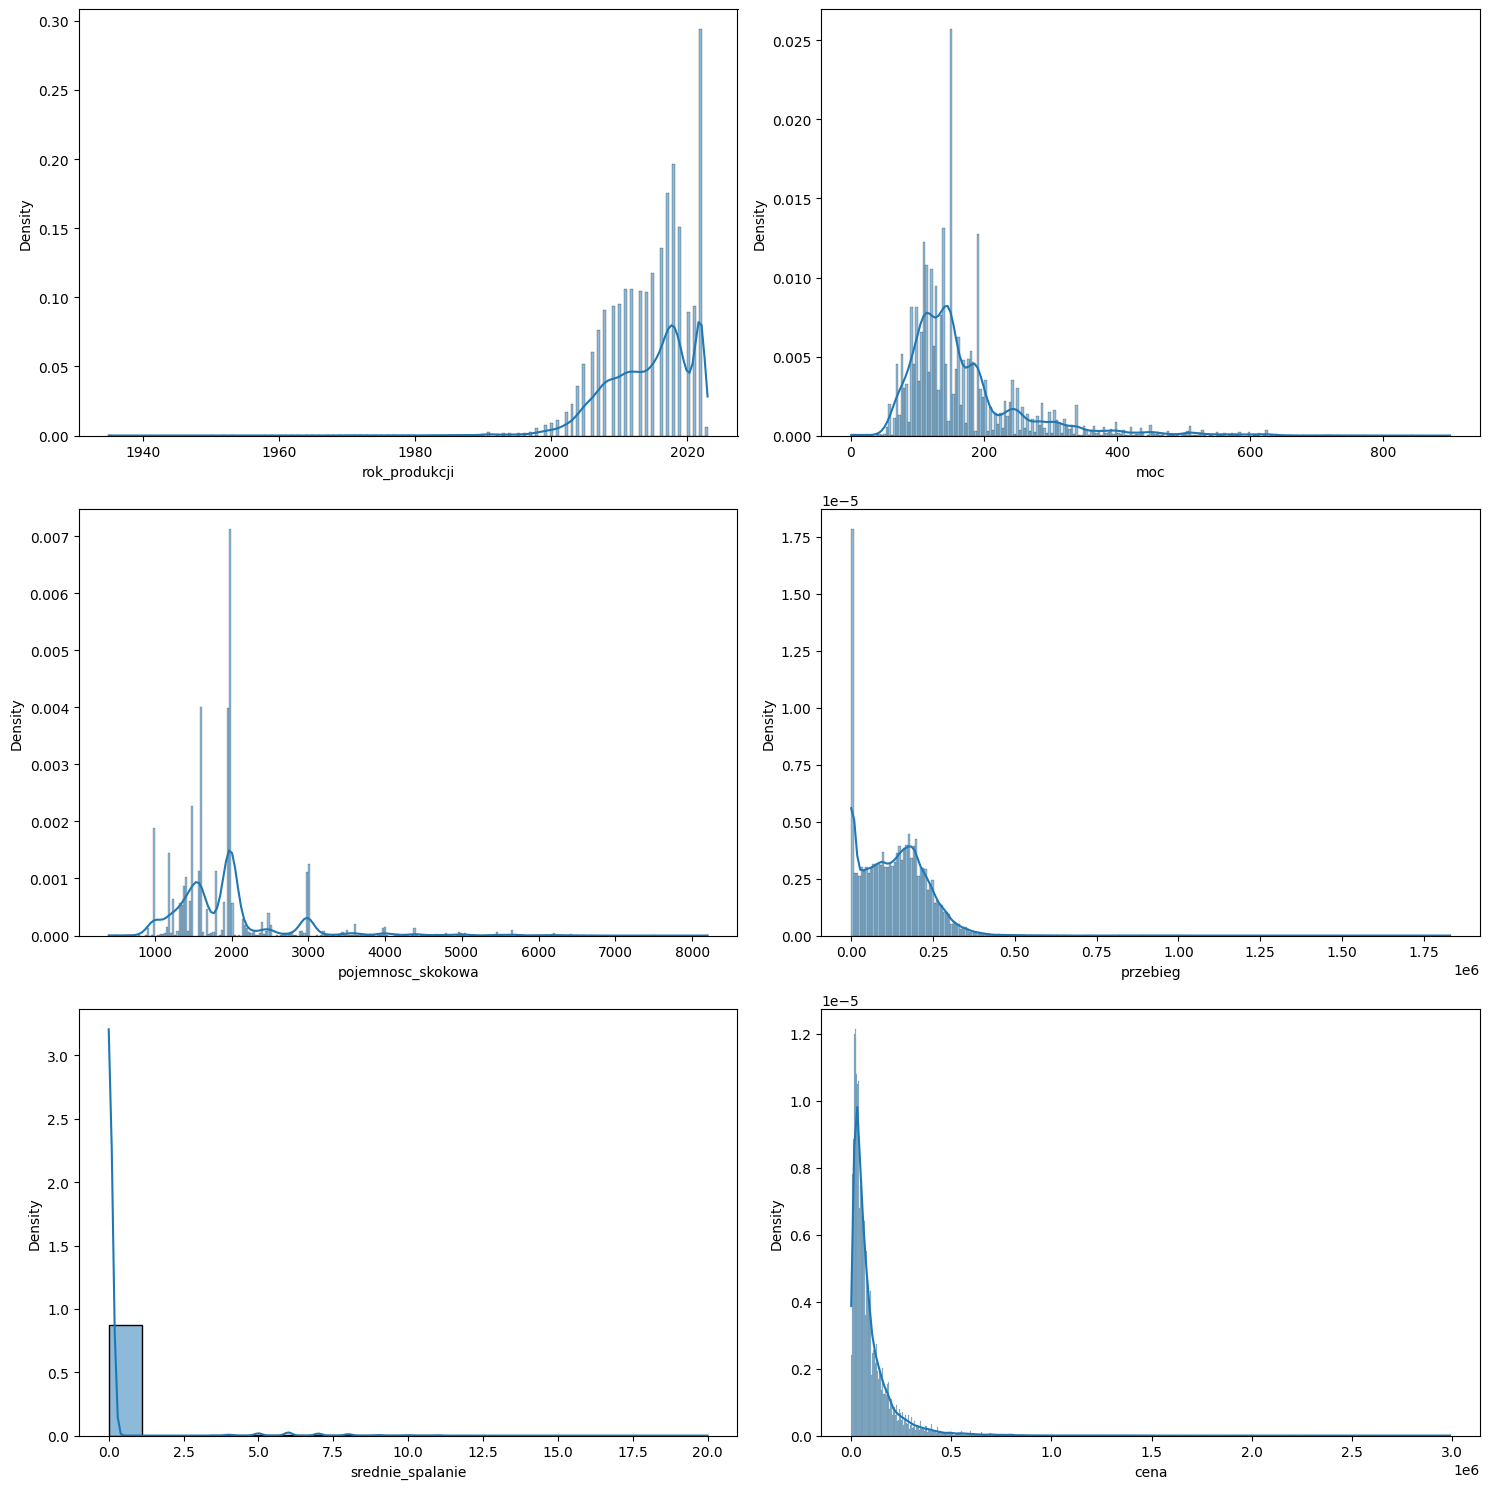

In [219]:
cols = ["rok_produkcji", "moc", "pojemnosc_skokowa", "przebieg", "srednie_spalanie", "cena"]


fig, axes = plt.subplots(3, 2, figsize=(15, 15))
axes = axes.ravel()  


for col, ax in zip(cols, axes):
    sns.histplot(data=average_cars[col], kde=True, stat='density', ax=ax)

fig.tight_layout()
plt.show()

# sns.displot(average_cars["cena"])

In [220]:
# copy of the dataframe and drop top 5% of all the columns values and bottom 5% of all the columns values
average_df = average_cars.copy()
average_df = average_df.drop(['srednie_spalanie'], axis=1)
for column in cols:
    average_df = average_df[average_cars[column].between(average_cars[column].quantile(.05), average_cars[column].quantile(.95))]
average_df.describe()

/var/folders/yn/p4l4vgsn02x1zd6m6bh9j44h0000gq/T/ipykernel_7807/4074752236.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  average_df = average_df[average_cars[column].between(average_cars[column].quantile(.05), average_cars[column].quantile(.95))]


,rok_produkcji,moc,l_miejsc,pojemnosc_skokowa,przebieg,cena,l_drzwi
count,33721.000000,33721.000000,32363.000000,33721.000000,33721.000000,33721.000000,33608.000000
mean,2014.847751,152.326473,5.066496,1788.588357,129604.700810,75243.865492,4.777315
std,4.664358,51.636692,0.632556,423.485385,78161.335117,58850.603338,0.572566
min,2004.000000,75.000000,1.000000,999.000000,5.000000,10900.000000,2.000000
25%,2011.000000,115.000000,5.000000,1498.000000,64911.000000,31700.000000,5.000000
50%,2016.000000,143.000000,5.000000,1798.000000,134000.000000,57000.000000,5.000000
75%,2018.000000,180.000000,5.000000,1995.000000,191000.000000,99200.000000,5.000000
max,2022.000000,340.000000,9.000000,3198.000000,288600.000000,299900.000000,5.000000


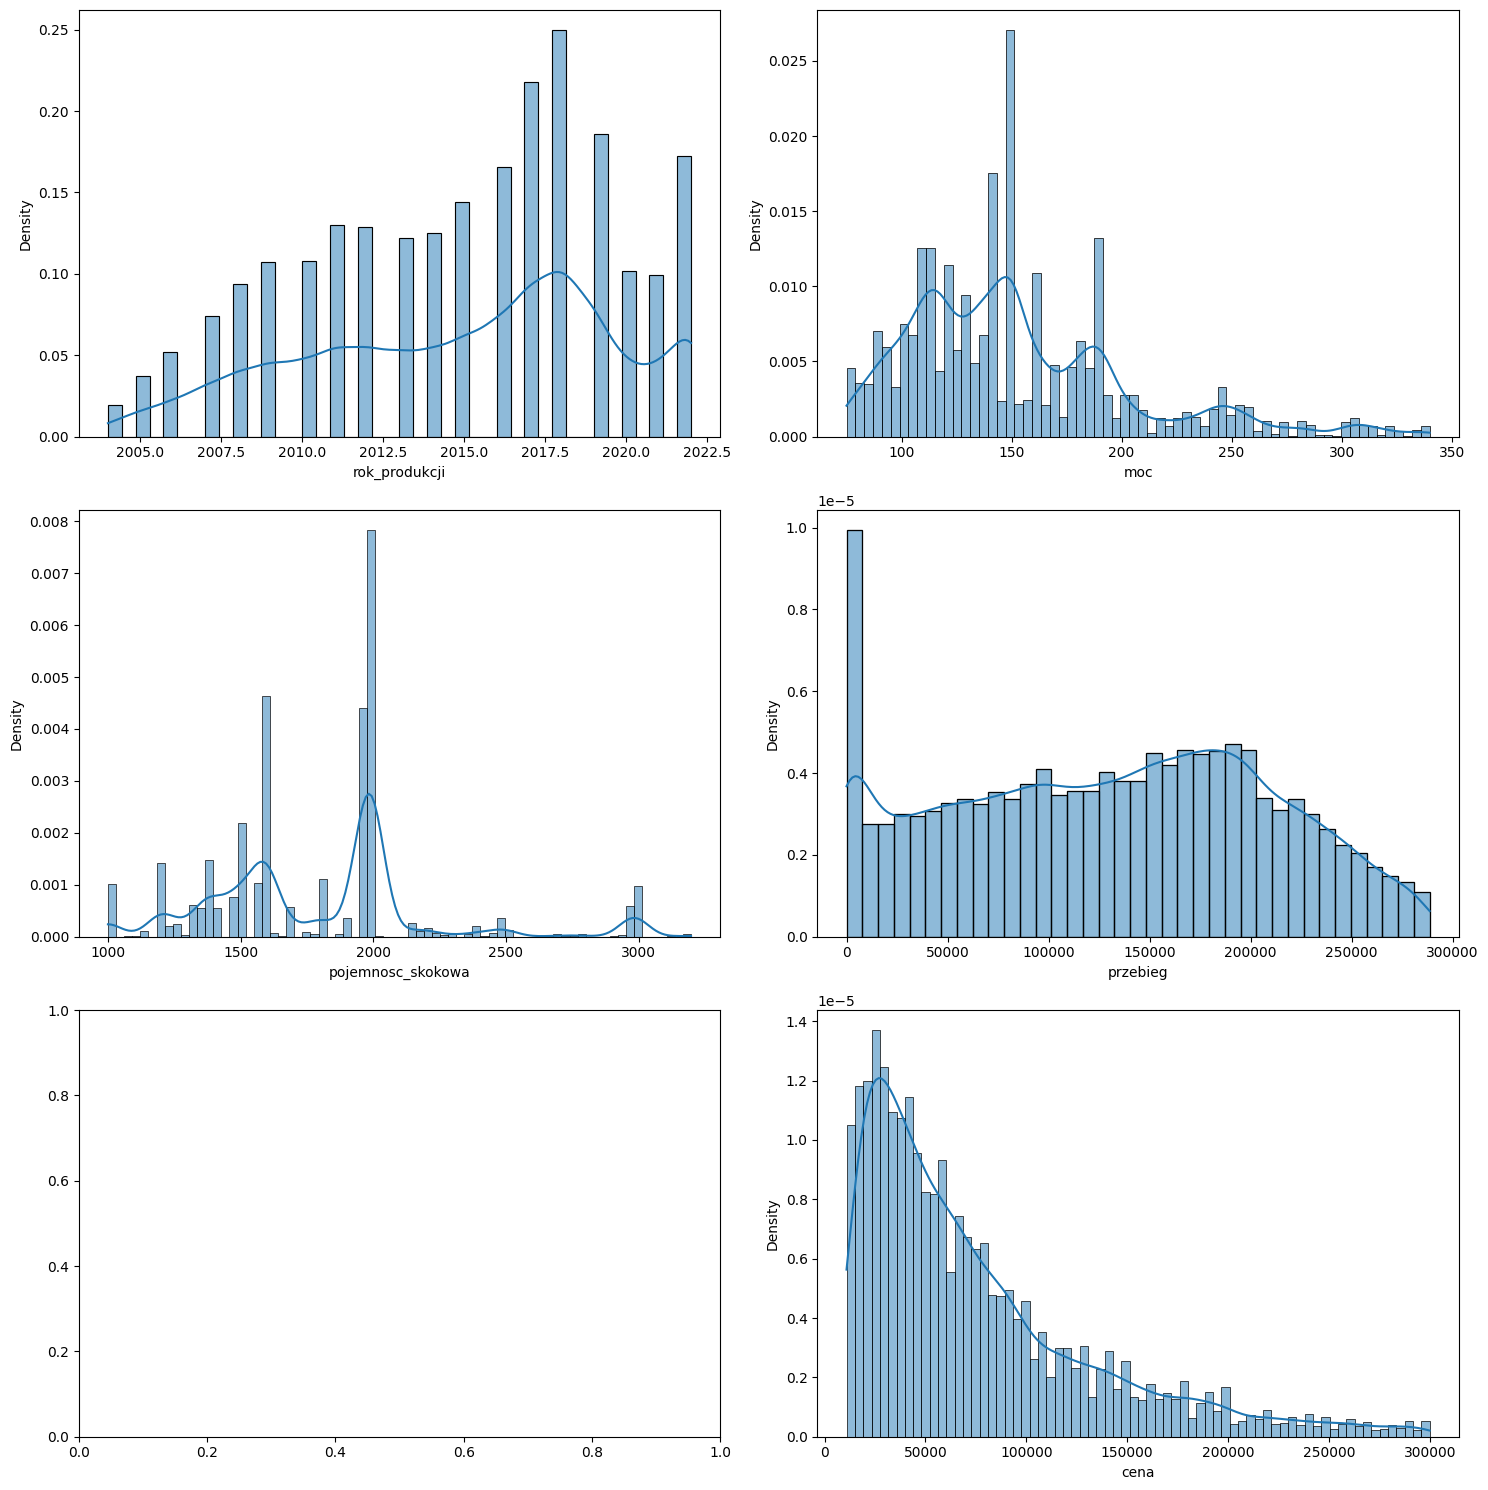

In [221]:
fig, axes = plt.subplots(3, 2, figsize=(15, 15))
axes = axes.ravel()  


for col, ax in zip(cols, axes):
    if col != "srednie_spalanie":
        sns.histplot(data=average_df[col], kde=True, stat='density', ax=ax)

fig.tight_layout()
plt.show()

/var/folders/yn/p4l4vgsn02x1zd6m6bh9j44h0000gq/T/ipykernel_7807/948892854.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(average_cars.corr(), annot=True, cmap="Blues")


<AxesSubplot: >

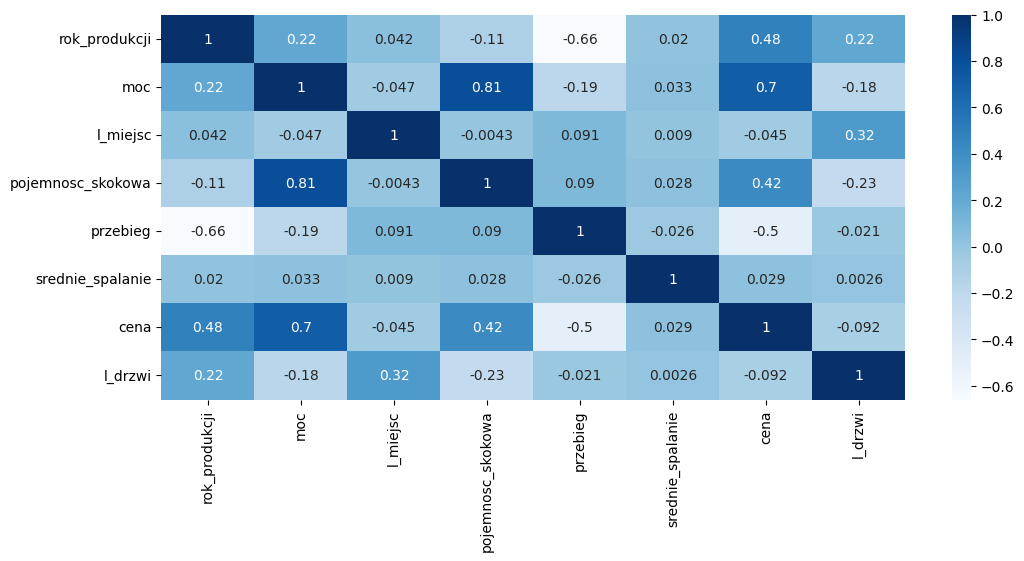

In [222]:
plt.figure(figsize=(12,5))
sns.heatmap(average_cars.corr(), annot=True, cmap="Blues")

/var/folders/yn/p4l4vgsn02x1zd6m6bh9j44h0000gq/T/ipykernel_7807/2929939242.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(average_df.corr(), annot=True, cmap="Blues")


<AxesSubplot: >

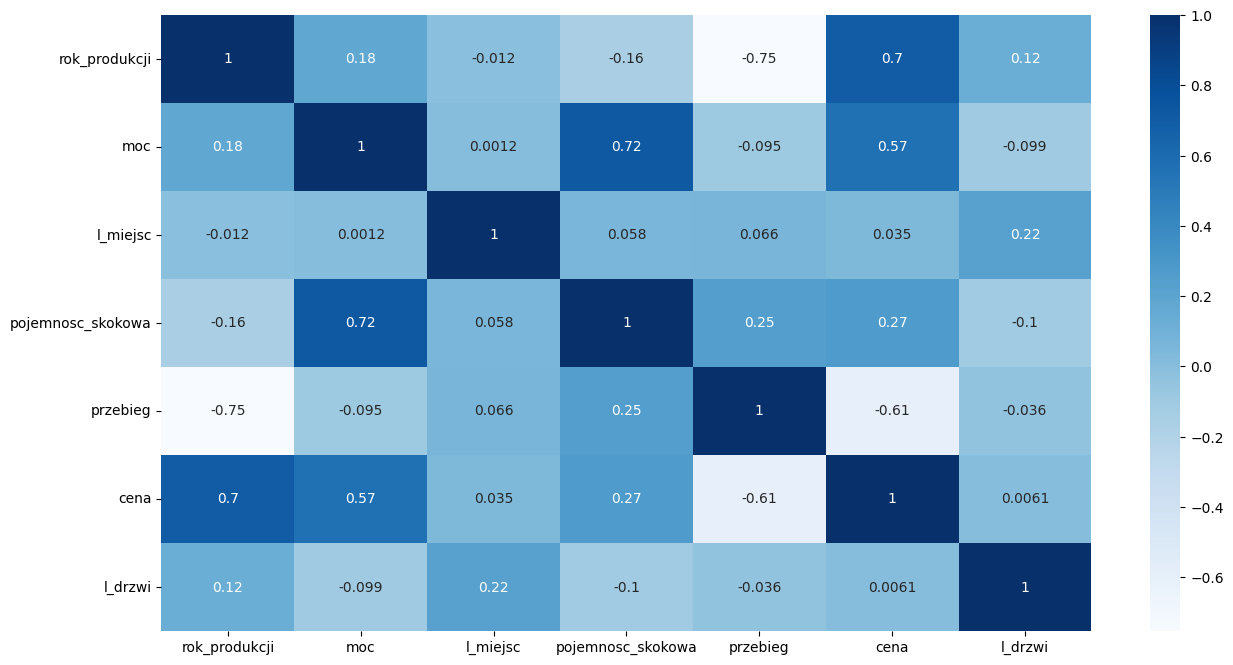

In [223]:
plt.figure(figsize=(15,8))
sns.heatmap(average_df.corr(), annot=True, cmap="Blues")

In [224]:
average_cars.shape

(68746, 25)

In [225]:
average_df.shape

(33721, 24)

In [226]:
average_cars[["cena", "rok_produkcji", "moc", "przebieg"]].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68746 entries, 0 to 68964
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   cena           68746 non-null  float64
 1   rok_produkcji  68746 non-null  float64
 2   moc            68699 non-null  float64
 3   przebieg       68243 non-null  float64
dtypes: float64(4)
memory usage: 4.6 MB


In [227]:
average_df[["cena", "rok_produkcji", "moc", "przebieg"]].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33721 entries, 0 to 47989
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   cena           33721 non-null  float64
 1   rok_produkcji  33721 non-null  float64
 2   moc            33721 non-null  float64
 3   przebieg       33721 non-null  float64
dtypes: float64(4)
memory usage: 1.3 MB


In [228]:
average_cars = average_cars.dropna(subset=["moc", "rok_produkcji", "przebieg"])

### sklearn - regresja

In [229]:
#TODO: instead average_cars I use average_df because I want to predict the price of the car based on the average values of the cars not the extreme values also it reduces the corner cases
X  = average_df[["moc", "rok_produkcji", "przebieg"]]
y = average_df["cena"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

l_reg = linear_model.LinearRegression()
l_reg.fit(X_train, y_train)

LinearRegression()

In [230]:
print('Coefficients: ', l_reg.coef_)
print('Variance score: {}'.format(l_reg.score(X_test, y_test)))

scoresMap.append(["Linear Regression", l_reg.score(X_test, y_test)])

Coefficients:  [ 5.28227884e+02  5.68509673e+03 -1.70214123e-01]
Variance score: 0.7197942988162749


Mean Absolute Error: 22372.3022713912
Mean Squared Error: 988234453.2250874
Root Mean Squared Error: 31436.196545146606


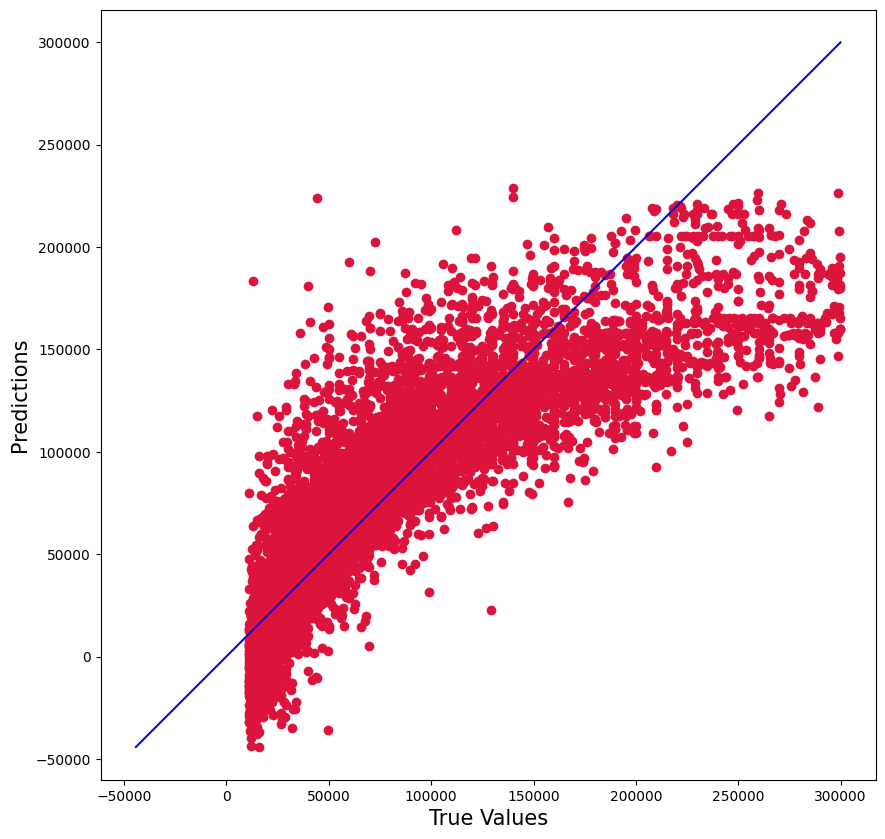

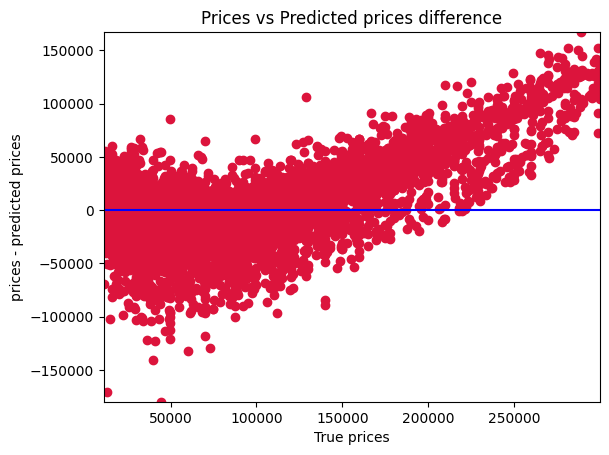

In [242]:

y_pred = l_reg.predict(X_test)

errorMetrics(y_test, y_pred)
chartOfTrueAndPredictedValues(y_test, y_pred)
chartOfPricesVsPredictedPricesDifference(y_test, y_pred)

In [231]:
poly_reg=PolynomialFeatures(degree=3)
X_poly=poly_reg.fit_transform(X)
poly_reg.fit(X_poly,y)
p_reg=linear_model.LinearRegression()
p_reg.fit(X_poly,y)

LinearRegression()

In [232]:
# print('Coefficients: ', p_reg.coef_)
print('Variance score: {}'.format(p_reg.score(X_poly, y)))

scoresMap.append(["Polynomial Regression", p_reg.score(X_poly, y)])

Variance score: 0.8030083930715113


Mean Absolute Error: 22372.3022713912
Mean Squared Error: 988234453.2250874
Root Mean Squared Error: 31436.196545146606


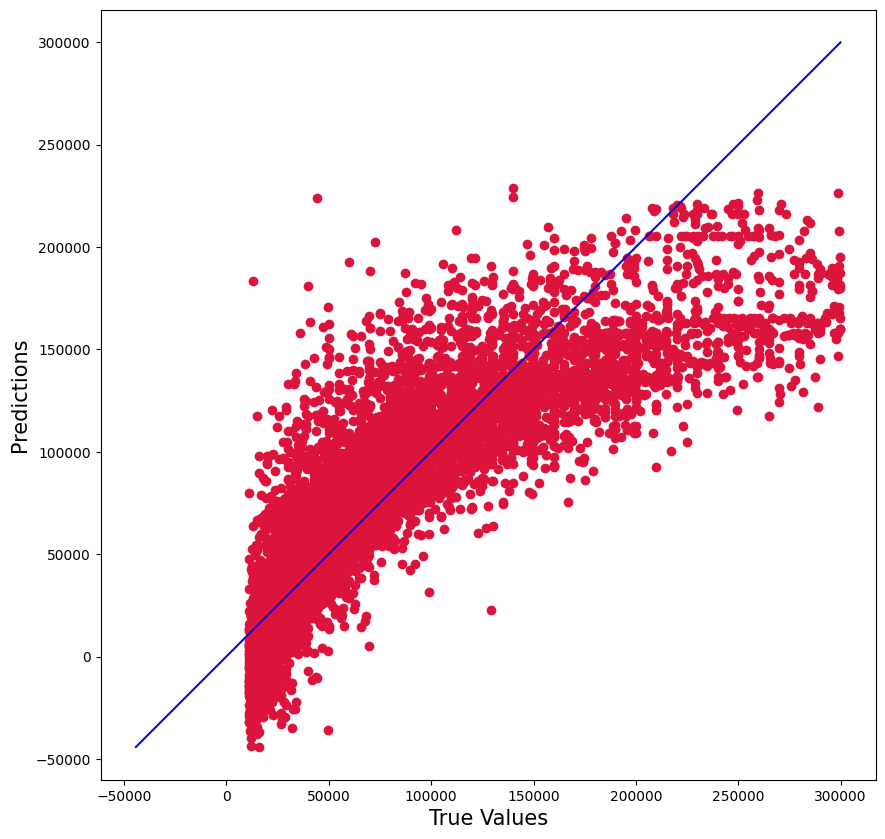

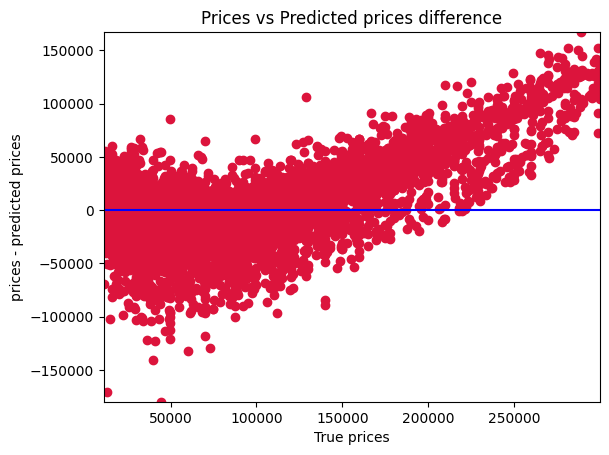

In [233]:
y_pred = l_reg.predict(X_test)

errorMetrics(y_test, y_pred)

chartOfTrueAndPredictedValues(y_test, y_pred)

chartOfPricesVsPredictedPricesDifference(y_test, y_pred)

### statsmodels - regresja

In [234]:
mod = sm.OLS(y_train,X_train).fit()

print(mod.summary())
# print mod score
print(mod.rsquared)

scoresMap.append(["Ordinary Least Squares", mod.rsquared])

                                 OLS Regression Results                                
Dep. Variable:                   cena   R-squared (uncentered):                   0.860
Model:                            OLS   Adj. R-squared (uncentered):              0.860
Method:                 Least Squares   F-statistic:                          4.849e+04
Date:                Fri, 16 Dec 2022   Prob (F-statistic):                        0.00
Time:                        00:40:52   Log-Likelihood:                     -2.8085e+05
No. Observations:               23604   AIC:                                  5.617e+05
Df Residuals:                   23601   BIC:                                  5.617e+05
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

Mean Absolute Error: 26120.735662687457
Mean Squared Error: 1277113295.770927
Root Mean Squared Error: 35736.72195055007


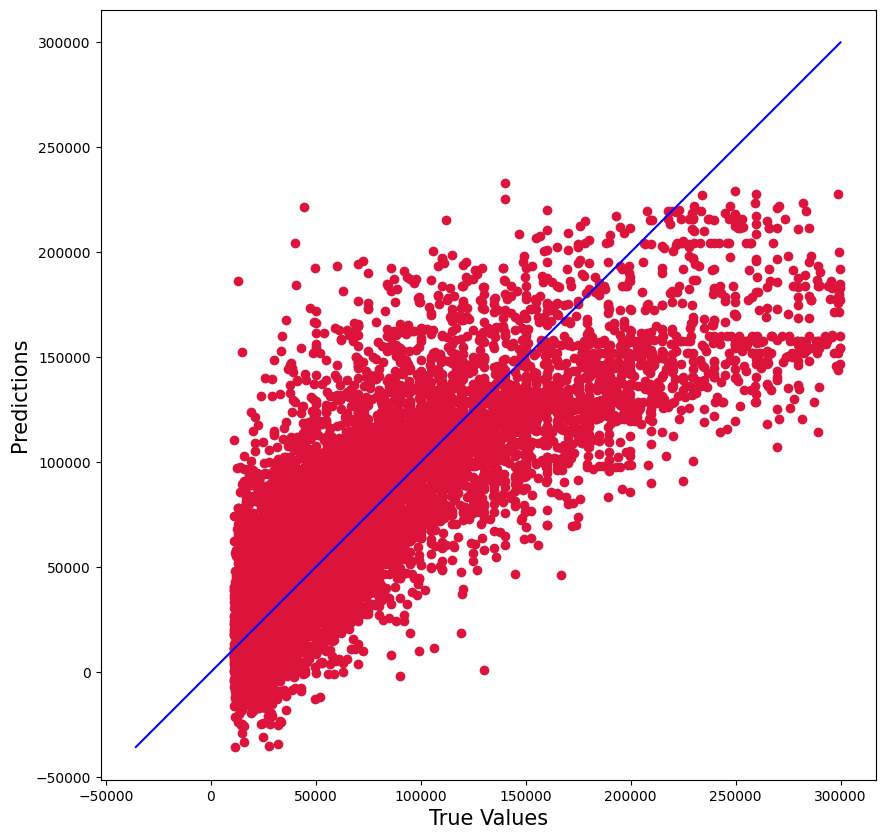

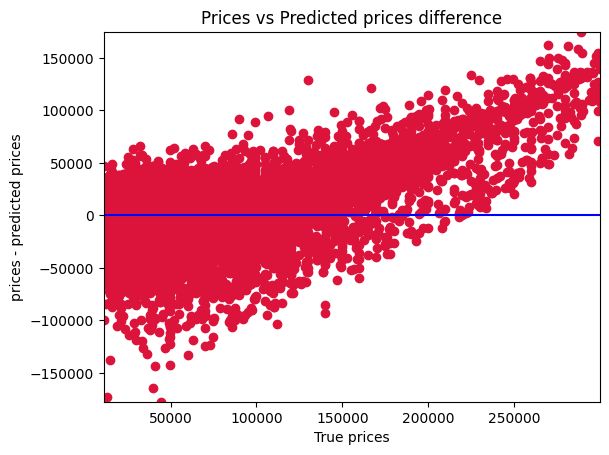

In [235]:
y_pred = mod.predict(X_test)

errorMetrics(y_test, y_pred)

chartOfTrueAndPredictedValues(y_test, y_pred)

chartOfPricesVsPredictedPricesDifference(y_test, y_pred)



In [236]:
from sklearn.linear_model import TweedieRegressor

reg = TweedieRegressor(power=1, alpha=0.5, link='log')
reg.fit(X_train, y_train)

print('Variance score: {}'.format(reg.score(X_test, y_test)))

scoresMap.append(["Tweedie Regressor", reg.score(X_test, y_test)])


Variance score: 0.676702140671724


Mean Absolute Error: 25151.005589294808
Mean Squared Error: 1298642106.0274205
Root Mean Squared Error: 36036.67723344399


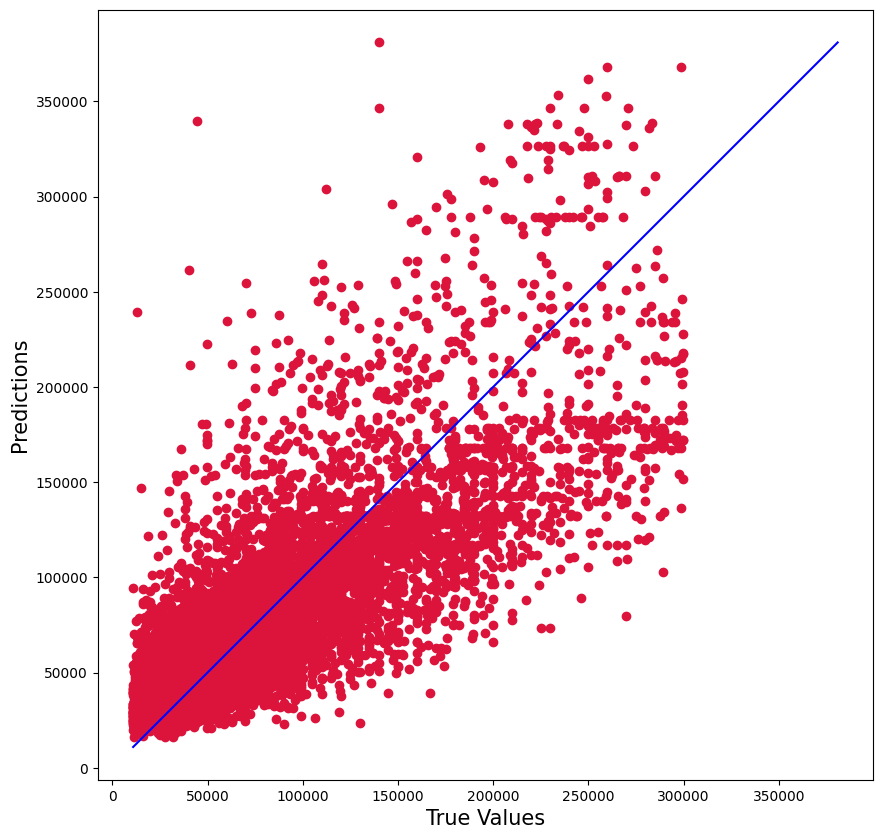

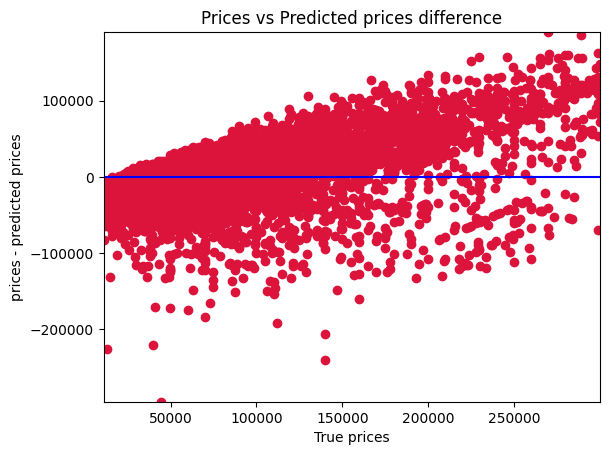

In [237]:
y_pred = reg.predict(X_test)

errorMetrics(y_test, y_pred)

chartOfTrueAndPredictedValues(y_test, y_pred)

chartOfPricesVsPredictedPricesDifference(y_test, y_pred)



In [238]:
from sklearn.linear_model import Ridge
r_reg = Ridge(alpha=0.5)
r_reg.fit(X_train, y_train)
print('Variance score: {}'.format(r_reg.score(X_test, y_test)))
y_pred = r_reg.predict(X_test)

scoresMap.append(["Ridge Regression", r_reg.score(X_test, y_test)])

Variance score: 0.719794300912723


Mean Absolute Error: 22372.29849596409
Mean Squared Error: 988234445.831297
Root Mean Squared Error: 31436.196427546656


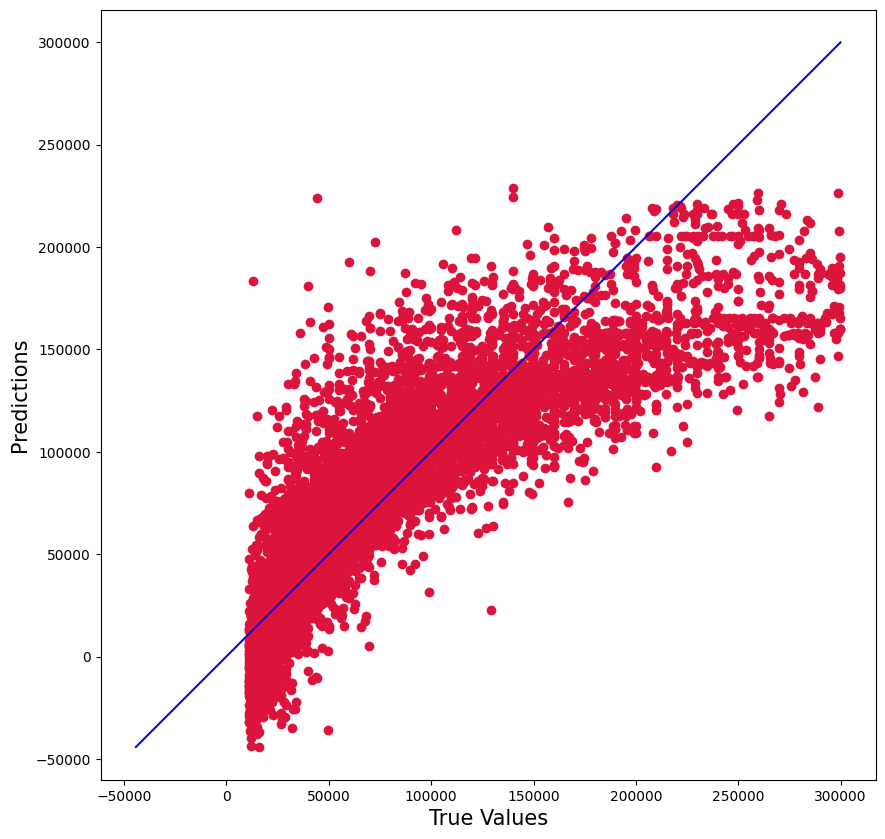

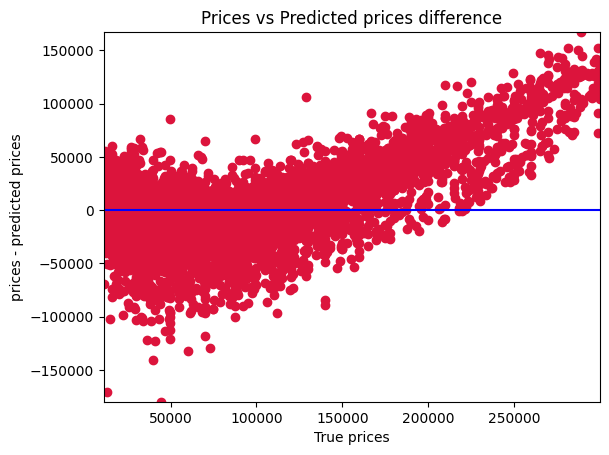

In [239]:

errorMetrics(y_test, y_pred)

chartOfTrueAndPredictedValues(y_test, y_pred)

chartOfPricesVsPredictedPricesDifference(y_test, y_pred)

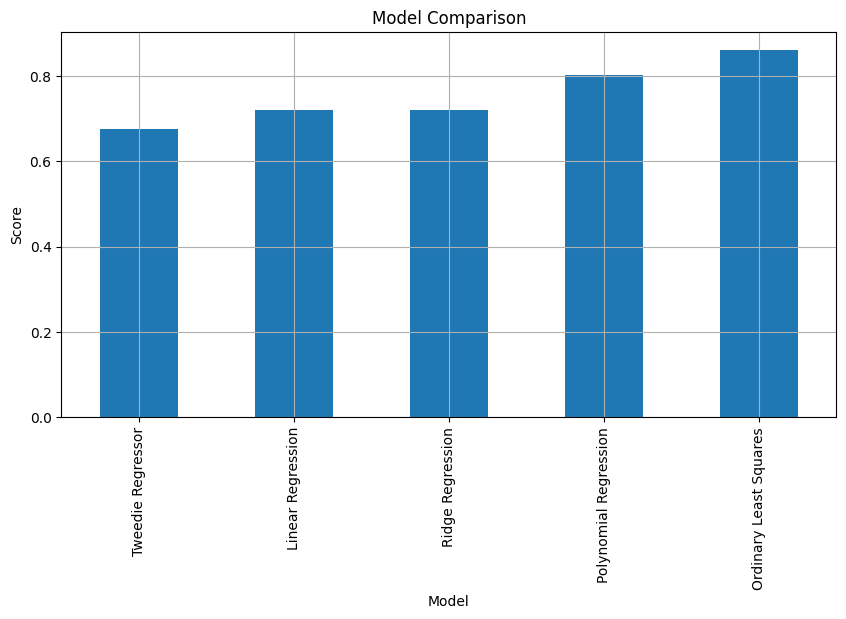

In [240]:

df = pd.DataFrame(scoresMap, columns = ['Model', 'Score'])
df = df.sort_values(by='Score')
df.plot(x='Model', y='Score', kind='bar', figsize=(10, 5), legend=False, grid=True)
plt.title('Model Comparison')
plt.ylabel('Score')
plt.show()